**In this example we will examine the motion of a particle undergoing anharmonic oscillations.**

Oscillating systems are ubiquitous in physics.  We can often approximate that small-amplitude oscillations are described by simple harmonic oscillators with potential energy $U(x)=\frac{1}{2}kx^2$, where $k$ is the spring constant, because potential wells are generally quadratic about their minima in accordance with Taylor's theorem.  However, for larger amplitudes, we can no longer assume that the potential energy is quadratic and hence we have an **anharmonic oscillator**.

Suppose particle of mass m moves in a *quartic* potential energy

$$U(x) = \frac{1}{2}kx^2 + ax^3 + bx^4,$$

where $k$ and $b$ are positive constants and $a$ is a constant that may be of either sign.  Physically, the cubic and quartic terms in the potential arise from retaining higher-order terms in the Taylor expansion of the potential energy about its minimum.  Often we can assume that $a$ and $b$ are small, but not necessarily negligible.

To avoid confusion, we shall assume that all quantities are in SI units.  (In "real life" it is often useful to choose appropriate units that give sensible numbers; e.g., in quantum chemistry and condensed matter physics we often use Hartree atomic units in which the numerical values of the electron mass $m_{\rm e}$, magnitude of electronic charge $|e|$, permittivity $4\pi\epsilon_0$ and reduced Planck constant $\hbar$ all take value 1.)

We introduce a class for anharmonic oscillators, holding the potential parameters and including methods to return the potential and the force due to the potential, as well as a method to plot the potential.

**Can you add a method to plot the force as a function of particle position?**

When we model this anharmonic oscillator, we assume that we still have just a single minimum at $x=0$ in the potential.  **Can you derive a condition on the cubic coefficient $a$ to ensure that no additional stationary points are introduced?**  Hints: (i) at stationary points the force on the particle is zero; (ii) use the discriminant of a quadratic to ensure that no additional stationary points are introduced.  **Can you add some code to raise a value error in the __init__ method if parameter values that would lead to additional stationary points are supplied?**

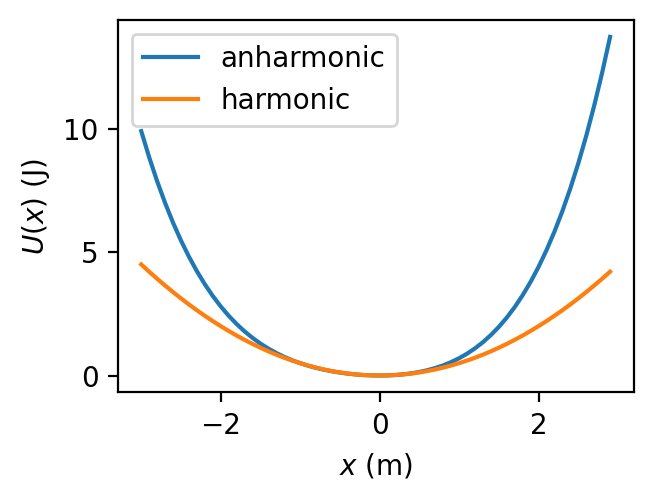

NameError: name 'ax' is not defined

<Figure size 700x520 with 0 Axes>

In [ ]:
import textwrap as tw
import numpy as np
import matplotlib.pyplot as plt

class ao:
    """Anharmonic oscillator of mass m in potential well U(x) = k.x^2/2 + a.x^3 + b.x^4."""
    
    def __init__(self,m=1.0,k=1.0,a=0.1,b=0.1):     # these are just the defualt values, used if none else are given
        if m<=0.0:
            raise ValueError("Mass m should be positive.")
        self.m=m # Mass
        if k<=0.0:
            raise ValueError("Spring constant k should be positive.")
        self.k=k # "Spring constant"
        self.a=a # Cubic coefficient
        if b<0.0:
            raise ValueError("Quartic coefficient b should be non-negative.")
        self.b=b # Quartic coefficient.
        # f(X) =0 <=> x.(k+3.a.x+4.b.x^29=0 the second factor has no real roots if the discriminant is -ve
        if 9*a**2-16*b*k > 0:
            raise ValueError("the Cubic anharmonicity is too large, introducing mutliple equil. points")
        

    def __str__(self):
        return tw.fill(f"Anharmonic oscillator, mass m={self.m:.15g}, spring constant k={self.k:.15g}, "
                       f"cubic anharmonicity a={self.a:.15g}, quartic anharmonicity b={self.b:.15g}")

    def U(self,x):
        """Return a quartic potential energy function U(x) = k.x^2/2 + a.x^3 + b.x^4."""
# Factorising the expression makes it more efficient to evaluate.
        return x*x*(0.5*self.k+x*(self.a+x*self.b)) #   use factorising to reduce the steps to evaluate, makes it more efficient

    def F(self,x):
        """Return the force on a particle in a quartic potential, F(x) = -U'(x) = -k.x - 3.a.x^2 - 4.b.x^3."""
        return -x*(self.k+x*(3.0*self.a+x*4.0*self.b))  # elemental function, acts on each element and returns and array of corresopnding force values
    
    def plot_potential(self):
        """Plot the potential together with the harmonic part of the potential."""
        fig=plt.figure(figsize=(3.5,2.6),dpi=200)
        ax=fig.add_subplot(1,1,1)
        ax.set_xlabel(r'$x$ (m)')
        ax.set_ylabel(r'$U(x)$ (J)')
        xx=np.arange(-3.0,3.0,0.1)  # Array of x values to plot.
        UU=self.U(xx) # Function U can take a NumPy array xx and return an array of corresponding potential values.
        ax.plot(xx,UU,label="anharmonic")
        UU=0.5*self.k*xx**2 # Harmonic potential values, for comparison.
        ax.plot(xx,UU,label="harmonic")
        ax.legend()
        fig.tight_layout()
        plt.show()

    def plot_Force(self):
        """Plot the potential together with the harmonic part of the potential."""
        fig=plt.figure(figsize=(3.5,2.6),dpi=200)
        ax=fig.add_subplot(1,1,1)
        ax.set_xlabel(r'$x$ (m)')
        ax.set_ylabel(r'$U(x)$ (J)')
        xx=np.arange(-3.0,3.0,0.1)  # Array of x values to plot.
        FF=self.F(xx) # Function U can take a NumPy array xx and return an array of corresponding potential values.
        ax.plot(xx,FF,label="anharmonic")
        FF=-self.k*xx # Harmonic potential values, for comparison.
        ax.plot(xx,FF,label="harmonic")
        ax.legend()
        fig.tight_layout()
        plt.show()
s=ao() # Default anharmonic oscillator.
s.plot_potential()
s.plot_Force()

Total energy (kinetic plus potential) is conserved throughout motion, i.e.,

$$\frac{1}{2}mv^2 + U(x) = E = {\rm constant},$$
  
where $v=dx/dt$ is velocity and $x$ is particle position.

Hence the velocity satisfies

$$v = \pm \sqrt{2[E - U(x)] / m}.$$
 
The left and right turning points $x_{\rm l}$ and $x_{\rm r}$ occur when $v=0$, i.e., where $U(x)=E$.

The time taken to get from the left turning point to the right turning point is

$$\frac{T}{2} = \int_{x_{\rm l}}^{x_{\rm r}} \frac{dx}{|v|} = \int_{x_{\rm l}}^{x_{\rm r}} \sqrt{\frac{m}{2[E - U(x)]}} \, dx.$$

Double this to find the oscillation period $T$.

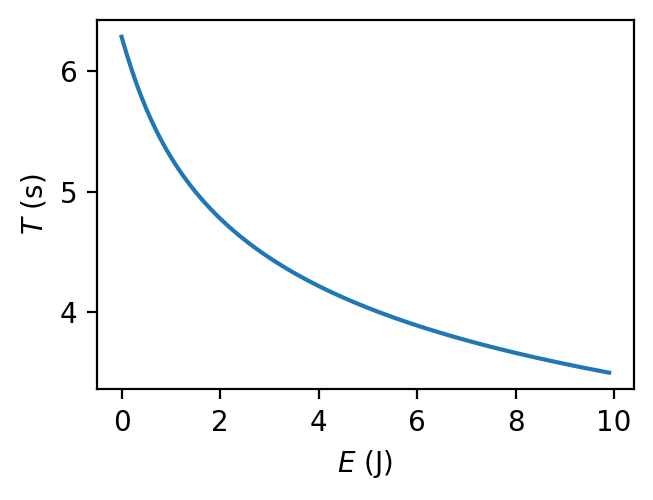

TypeError: period() missing 1 required positional argument: 'E'

In [6]:
from scipy import integrate

class ao_solver(ao):
    """Extension of anharmonic oscillator class containing methods to find the period by integration."""
    
    def find_tps_nr(self,xinit,E):
        """Use Newton-Raphson to solve U(x)-E=0, giving the turning point x.  xinit is initial guess at x."""
        xp=xinit-1.0
        x=xinit
        i=0
        while abs(x-xp)>1.E-15*abs(xp):
            i+=1
            if i>10000:
                raise RuntimeError("Newton-Raphson iteration has failed to converge.")
            xp=x
            try:
                x=x+(self.U(x)-E)/self.F(x) # NB, F(x)=-dU/dx.
            except ZeroDivisionError:
                x=1.E-8*np.sign(xinit)
        return x

    def find_tps(self,E):
        """Find the left and right turning points (i.e., solutions of U(x)=E)."""
        xrh=np.sqrt(2.0*E/self.k) # First guess: (+/-)sqrt(2.E/k), which is correct for harmonic well.
        xr=self.find_tps_nr(xrh,E) ; xl=self.find_tps_nr(-xrh,E) # Use Newton-Raphson to find the turning points.
        if xr-xl<1.E-12*abs(xr): # Check that xl and xr are the distinct le4*4*bft and right turning points.
            raise RuntimeError("Have not found distinct turning points in correct order.")
        return xl,xr

    def reciprocal_speed(self,x,E):
        """Return one over the speed of the particle at position x with total energy E."""
        return np.sqrt(self.m/(2.0*(max(E-self.U(x),0.0))))

    def period(self,E):
        """Evaluate the period of the particle's oscillation at energy E as twice the time taken to get from
        the left-hand to the right-hand turning point.  This time is Int_xl^xr dx/|v(x)|, where |v(x)|
        is the speed of the particle.  Use a canned numerical integration routine."""
        xl,xr=self.find_tps(E)
        half_T,err_half_T=integrate.quad(self.reciprocal_speed,xl,xr,args=E)
        return 2.0*half_T,2.0*err_half_T
    
    def plot_period_against_E(self):
        """Plot oscillation period against energy."""
        EE=np.arange(0.0001,10.0,0.1) # Avoid numerical problems calculating the oscillation period at E=0.
        TT=[] ; errTT=[]
        for E in EE:
            T=self.period(E)
            TT.append(T[0]) ; errTT.append(T[1])
        fig=plt.figure(figsize=(3.5,2.6),dpi=200)
        ax=fig.add_subplot(1,1,1)
        ax.set_xlabel(r'$E$ (J)')
        ax.set_ylabel(r'$T$ (s)')
        ax.errorbar(EE,TT,errTT)
        fig.tight_layout()
        plt.show()

s=ao_solver() # Default anharmonic oscillator.
s.plot_period_against_E()
print(f"exact period: {s.period()}")

Now we will simulate Newton's laws of motion for the particle undergoing anharmonic oscillations.

We chop up time into a series of small "time steps" $dt$.  Acceleration is rate of change of velocity; so velocity approximately changes by acceleration times $dt$ over the time step.  Likewise, position changes by velocity times $dt$ over a time step.

**Can you add a method to evaluate the total energy for a particular position $x$ and velocity $v$, and then plot the energy against time during the particle's motion?**

**Can you add code that examines the simulation results and evaluates the oscillation period?  Do your results agree with the orbital period obtained in the previous cell?**

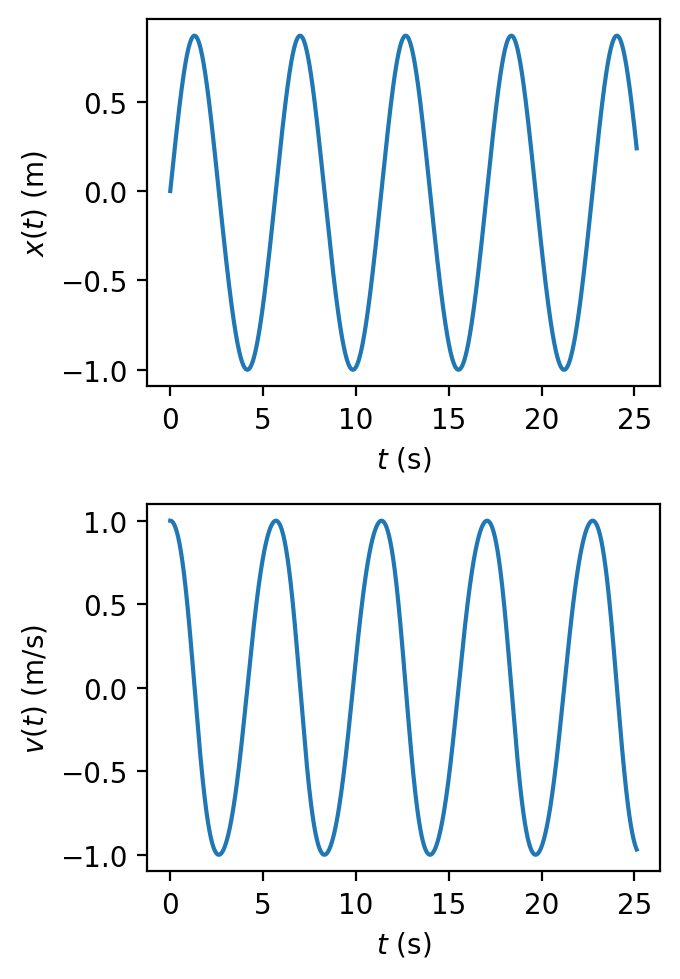

ValueError: Cannot evaluate period - not enough x data

In [ ]:
class ao_simulator(ao): # inherits all of tge "things" from the ao class too, an inherited class
    """Extend the anharmonic oscillator class to include some methods for simulating Newton's laws."""

    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) # Call the __init__ method of the parent class (ao).
        self.tt=None ; self.xx=None ; self.vv=None # Lists of times (t), positions (x) and velocities (v).

    def simulate(self,xinit,vinit,dt_over_Tharmonic=0.001,Nharmonic_periods=4.0):
        """Carry out a numerical simulation of the motion of the particle in the anharmonic potential
        by numerically solving Newton's laws of motion.  xinit and vinit are the initial position and
        velocity; dt_over_Tharmonic is the time step as a fraction of the harmonic oscillator period
        and Nharmonic_periods is the duration of the simulation in harmonic oscillator periods."""
        if dt_over_Tharmonic<=0.0:
            raise ValueError("dt_over_Tharmonic ought to be positive.")
        if Nharmonic_periods<=0.0:
            raise ValueError("Nharmonic_periods ought to be positive.")
        harmonic_period=2.0*np.pi*np.sqrt(self.m/self.k) # Period in absence of anharmonicity.
        dt=dt_over_Tharmonic*harmonic_period # Time step.
        Nsteps=int(Nharmonic_periods*harmonic_period/dt) # Number of time steps - enough for a few periods.
        t=0.0 ; x=xinit ; v=vinit # Initial time, position and velocity.
        self.tt=[] ; self.xx=[] ; self.vv=[]
        for _i in range(Nsteps):
            # Append to lists of time, position and velocity.
            self.tt.append(t) ; self.xx.append(x) ; self.vv.append(v)
            x,v=self.new_pos_vel(x,v,self.F,self.m,dt) # Update the position and velocity.
            t+=dt
        # Append final time step as (Nsteps+1)th data point.
        self.tt.append(t) ; self.xx.append(x) ; self.vv.append(v)

    @staticmethod
    def new_pos_vel(x,v,F,m,dt):
        """Return updated position and velocity after time step dt.  Current position and velocity
        are x and v.  Function F evaluates the force.  m is the particle mass and dt is the time step.
        The Euler-Cromer method is used."""
        vnew=v+F(x)/m*dt # New velocity is old velocity plus old acceleration times dt.
        xnew=x+vnew*dt # Euler-Cromer: new position is old position plus *new* velocity times dt. 
        return xnew,vnew
    
    def plot_x_and_v(self):
        """Plot the position x(t) and velocity v(t)."""
        if self.tt is None or self.xx is None or self.tt is None:
            raise RuntimeError("Need to use simulate method before plot_x_and_v method.")
        fig=plt.figure(figsize=(3.5,5),dpi=200)
        ax=fig.add_subplot(2,1,1)
        ax.set_xlabel(r'$t$ (s)')
        ax.set_ylabel(r'$x(t)$ (m)')
        ax.plot(self.tt,self.xx)
        bx=fig.add_subplot(2,1,2)
        bx.set_xlabel(r'$t$ (s)')
        bx.set_ylabel(r'$v(t)$ (m/s)')
        bx.plot(self.tt,self.vv)
        fig.tight_layout()
        plt.show()

    def period(self):
        n_equil =0
        for i in range(len(self.xx)-1):
            if self.xx[i]<0.0 and self.xx[i+1]>=0.0:
                i_equil=i
                n_equil+=1
                if n_equil == 1:
                    i_init = i
            if n_equil <2:
                raise ValueError("Cannot evaluate period - not enough x data")
        t_init = ao_simulator.lin_interp(self.xx[i_init], self.xx[i_init+1], self.tt[i_init], self.tt[i_init+1, 0.0])
        t_final = ao_simulator.lin_interp(self.xx[i_equil], self.xx[i_equil+1], self.tt[i_equil], self.tt[i_equil+1, 0.0])
        # return self.tt[i_equil]-self.tt[i_init] / (n_equil-1)
        return (t_final-t_init)/(n_equil-1)

@staticmethod
def lin_interp(x0, x1, t0, t1, x):
    return t0 + (t1-t0)/(x1-x0)*(x-x0)

s=ao_simulator() # Default anharmonic oscillator.
s.simulate(0.0,1.0, dt_over_Tharmonic=0.00001) # Simulate a few periods, starting at x=0 with velocity 1.0 m/s.
s.plot_x_and_v()
# s.plot_E()
print(s.period())

# aiming for period 5.688s

